<a href="https://colab.research.google.com/github/coding-dojo-data-science/Dimensionality-Reduction-Curriculum/blob/main/SOLUTIONS_PCA_for_Data_Visualization_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Clusters with Principal Component Analysis

In this exercise you will cluster credit card customer data using 8 features and visualize those clusters in a two-dimensional scatter plot.

In order to accomplish this, you will:
1. Import libraries
2. Load data [found here](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv)
3. Drop unneeded columns
4. Explore the data and clean as needed
5. Scale the Data
6. Tune a KMeans model and cluster the scaled data
7. Transform the scaled data using PCA
8. Create a scatter plot of the first 2 principal components of the PCA data, colored by the labels from the KMeans model.
9. Bonus: Create a 3D scatter plot using Plotly Express scatter_3d() function using the first 3 principal components of the PCA data as the x, y, and z axes and the labels from the KMeans model as the color.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Load Data

In [3]:
df = pd.read_csv('https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


# 3. Drop Unnecessary Columns

In [4]:
df.drop(columns=['Unnamed: 0', 'Customer Id'], inplace=True)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


# 4. EDA and Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [22]:
mode = df['Defaulted'].mode()[0]
df['Defaulted'].fillna(mode, inplace=True)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

# 5. Scale Data

In [23]:
x_scaled = StandardScaler().fit_transform(df)
x_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# 6. Tune a KMeans Model and Cluster the Scaled Data

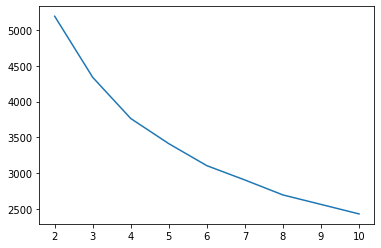

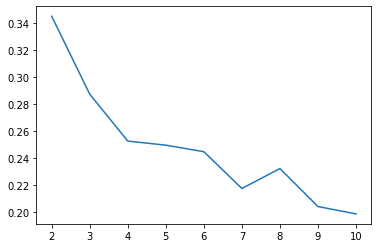

In [25]:
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(x_scaled)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(x_scaled, model.labels_))

plt.plot(ks, inertias)

plt.show()

plt.plot(ks, sils)


In [37]:
kmeans_model = KMeans(n_clusters=3)

kmeans_model.fit(x_scaled)

KMeans(n_clusters=3)

# 7. Transform the Scaled Data with PCA

In [39]:
pca = PCA()
pca_df = pca.fit_transform(x_scaled)

# 8. Plot the Clusters

- The x axis should be the first principal component, you can extract this from the PCA array with `pca_data[:,0]`

- The y axis should be the second principal component, you can extract this from the PCA array with `pca_data[:,0]`

- The `c` argument should be the labels from the kmeans model.

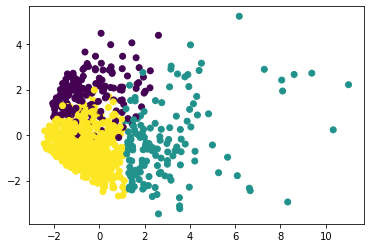

In [40]:
plt.scatter(pca_df[:,0], pca_df[:,1], c=kmeans_model.labels_)

# 9. BONUS Plot 3 components with Plotly Express

x, y, and z should be the first 3 components and color should be the KMeans model clusters.

[scatter_3d documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [41]:
import plotly.express as px

In [42]:
px.scatter_3d(x=pca_df[:,0], y=pca_df[:,1], z=pca_df[:,2], color=kmeans_model.labels_)